# Locally Weighted Regression
## 1) Read and Normalize the dataset
## 2) Generate W for every Query Point
## 3) No training is involved, directly make predictions using closed form solution we derived
## 4) Find the best possible tau(Bandwidth parameter)[Cross Validation]

# Loading Data

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
# 3x^3 -5x^2 + 7x + 2

def getData(m):
    X=np.random.rand(m,1)
    noise = np.random.randn(m,1)
    Y = 3*X**5 - X**4 - 12*X**2 + 7*X + 2 + .1*noise
    print(noise.shape)
    Y=Y.reshape((m,))
    return X,Y


    
    
    

In [86]:
X,Y = getData(100)

(100, 1)


In [87]:
print(X.shape)
print(Y.shape)

(100, 1)
(100,)


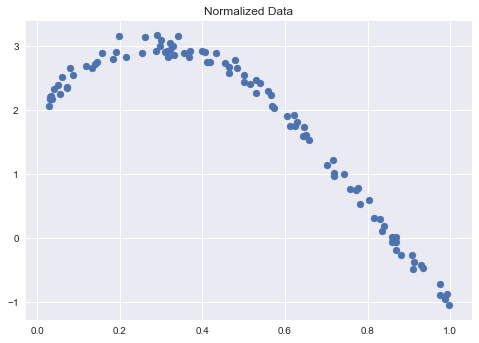

In [88]:
plt.title('Normalized Data')
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

In [89]:
def getW(query_point,X,tau):
    
    W = np.eye(X.shape[0])
    W = np.mat(W)
#     print(W.shape)
    
    for i in range(X.shape[0]):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi - x),(xi-x).T)/(-2*tau*tau))
    
    return W

def predict(X,Y,query_point,tau):
    
    ones = np.ones((X.shape[0],1))
    
    X_ = np.hstack((X,ones))
    
    qx= np.mat([query_point,1])
    
    W = getW(qx,X_,tau)
    
#     print(W.shape)
#     print(X_.shape)
#     print(Y.shape)
#     print(X_[:5,:])

    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    
    return theta,pred

    
    

In [116]:
X = np.mat(X)
Y = np.mat(Y)
Y=Y.reshape((-1,1))
W = getW(0.6,X,0.1)

In [117]:
print(W)

[[5.11618506e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.01963511e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.37717588e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.93628886e-08
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.32766143e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.65475837e-01]]


In [114]:
theta,pred = predict(X,Y,0.6,0.1)

In [115]:
print(theta)
print(pred)

[[-6.16440399]
 [ 5.58502816]]
[[1.88638577]]


In [124]:
X_test = np.linspace(0,1,10)

Y_test = []

for x in X_test:
    
    theta,pred = predict(X,Y,x,0.090)
    
    Y_test.append(pred)
    
Y_test = np.array(Y_test)
Y_test = np.concatenate(Y_test,axis=0)
Y_test = np.concatenate(Y_test,axis=0)
Y_test = np.array(Y_test)

print(Y_test.shape)
print(Y_test)
print(X_test)


(10,)
[ 2.0654948   2.56050733  2.83985452  2.90553408  2.65227517  2.16319685
  1.45057109  0.63448986 -0.20506498 -1.00650372]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [125]:
X=np.array(X)
Y=np.array(Y)

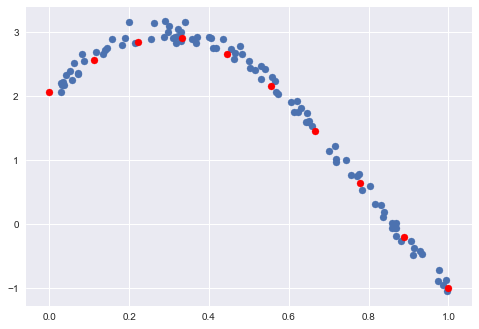

In [126]:
plt.scatter(X,Y)
plt.scatter(X_test,Y_test,color='red')
plt.show()